# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
import urllib
# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
#     print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | warrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=warrington
Processing Record 2 of Set 1 | nyimba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=nyimba
Processing Record 3 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=punta%20arenas
Processing Record 4 of Set 1 | holetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=holetown
Processing Record 5 of Set 1 | manzil tamim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=manzil%20tamim
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f

Processing Record 2 of Set 2 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=ketchikan
Processing Record 3 of Set 2 | champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=champerico
Processing Record 4 of Set 2 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=pevek
Processing Record 5 of Set 2 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=yumen
Processing Record 6 of Set 2 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=taolanaro
City not found. Skipping...
Processing Record 7 of Set 2 | menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=menongue
Processing Record 8 of Set 2 | kudahuvadhoo
http://api.openweath

Processing Record 4 of Set 3 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=kruisfontein
Processing Record 5 of Set 3 | qujing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=qujing
Processing Record 6 of Set 3 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=chokurdakh
Processing Record 7 of Set 3 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=upernavik
Processing Record 8 of Set 3 | gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=gornopravdinsk
Processing Record 9 of Set 3 | abu kamal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=abu%20kamal
Processing Record 10 of Set 3 | kavieng
http://api.openweather

Processing Record 7 of Set 4 | muli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=muli
Processing Record 8 of Set 4 | chulman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=chulman
Processing Record 9 of Set 4 | kazalinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=kazalinsk
City not found. Skipping...
Processing Record 10 of Set 4 | ozark
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=ozark
Processing Record 11 of Set 4 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=iqaluit
Processing Record 12 of Set 4 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=barentsburg
City not found. Skipping...
Processing Record 13 of Set 4 | springd

City not found. Skipping...
Processing Record 10 of Set 5 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=broome
Processing Record 11 of Set 5 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=hirara
Processing Record 12 of Set 5 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=korla
City not found. Skipping...
Processing Record 13 of Set 5 | huanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=huanan
Processing Record 14 of Set 5 | yambio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=yambio
City not found. Skipping...
Processing Record 15 of Set 5 | tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=tevaitoa
Processing Record 16

Processing Record 13 of Set 6 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=klaksvik
Processing Record 14 of Set 6 | calvia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=calvia
Processing Record 15 of Set 6 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=leningradskiy
Processing Record 16 of Set 6 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=nanortalik
Processing Record 17 of Set 6 | dunmore town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=dunmore%20town
Processing Record 18 of Set 6 | areka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=areka
Processing Record 19 of Set 6 | phuket
http://api.openweathermap.org

Processing Record 16 of Set 7 | kupang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=kupang
Processing Record 17 of Set 7 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=vao
Processing Record 18 of Set 7 | sembe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=sembe
City not found. Skipping...
Processing Record 19 of Set 7 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=buala
Processing Record 20 of Set 7 | lokoja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=lokoja
Processing Record 21 of Set 7 | mae sai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=mae%20sai
Processing Record 22 of Set 7 | skibbereen
http://api.openweathermap.org/data/2.5/we

Processing Record 18 of Set 8 | tandlianwala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=tandlianwala
Processing Record 19 of Set 8 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=saldanha
Processing Record 20 of Set 8 | dobsice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=dobsice
Processing Record 21 of Set 8 | kropotkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=kropotkin
Processing Record 22 of Set 8 | luena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=luena
Processing Record 23 of Set 8 | moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=moron
Processing Record 24 of Set 8 | galeras
http://api.openweathermap.org/data/2.5/weather

Processing Record 21 of Set 9 | guariba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=guariba
Processing Record 22 of Set 9 | arcata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=arcata
Processing Record 23 of Set 9 | mokrous
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=mokrous
Processing Record 24 of Set 9 | sjenica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=sjenica
Processing Record 25 of Set 9 | lodja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=lodja
Processing Record 26 of Set 9 | marang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=marang
City not found. Skipping...
Processing Record 27 of Set 9 | burkhala
http://api.openweathermap.org/dat

Processing Record 24 of Set 10 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=petropavlovsk-kamchatskiy
Processing Record 25 of Set 10 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=narsaq
Processing Record 26 of Set 10 | payo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=payo
Processing Record 27 of Set 10 | oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=oistins
Processing Record 28 of Set 10 | garm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=garm
City not found. Skipping...
Processing Record 29 of Set 10 | shieli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=shieli
Processing Record 30 of Set 10 | grand-s

Processing Record 26 of Set 11 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=flin%20flon
Processing Record 27 of Set 11 | preobrazheniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=preobrazheniye
Processing Record 28 of Set 11 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=bathsheba
Processing Record 29 of Set 11 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=port%20hedland
Processing Record 30 of Set 11 | appiano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=appiano
City not found. Skipping...
Processing Record 31 of Set 11 | antsohihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=antsohihy
Processing Record 32

City not found. Skipping...
Processing Record 28 of Set 12 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=nome
Processing Record 29 of Set 12 | tehachapi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=tehachapi
Processing Record 30 of Set 12 | ozerne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=ozerne
Processing Record 31 of Set 12 | kempele
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=kempele
Processing Record 32 of Set 12 | bengkalis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=bengkalis
City not found. Skipping...
Processing Record 33 of Set 12 | toliary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=toliary
City not found. Skipping...
Proc

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv('cities_whether.csv', index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [31]:
city_data_pd.head()


City  Cloudiness Country        Date  Humidity    Lat    Lng  \
0    warrington          40      GB  1542070200        87  53.39  -2.59   
1        nyimba           0      ZM  1542073564        79 -14.56  30.81   
2  punta arenas          75      CL  1542070800        66 -53.16 -70.91   
3      holetown          40      BB  1542070800        83  13.19 -59.64   
4       ushuaia          20      AR  1542070800        73 -54.81 -68.31   

   Max Temp  Wind Speed  
0     46.40       14.99  
1     61.65        6.17  
2     48.20       11.41  
3     80.60       14.99  
4     44.60       25.28

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0     lompoc           1      US  1534984500        44  34.64 -120.46   
1   klaksvik          92      FO  1534983600       100  62.23   -6.59   
2  bisignano           0      IT  1534981800        88  39.50   16.27   
3       hilo          90      US  1534984860        90  19.71 -155.08   
4    rikitea           8      PF  1534986579       100 -23.12 -134.97   

   Max Temp  Wind Speed  
0     77.00       11.41  
1     50.00       13.87  
2     66.20        5.82  
3     77.00        8.05  
4     69.58       19.71

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [32]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latitude cs temperature.png")

# Show plot
plt.show()

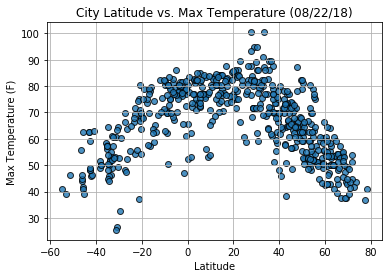

#### Latitude vs. Humidity Plot

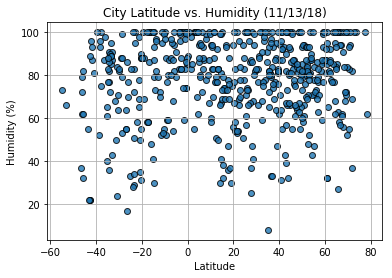

In [33]:
# Build the scatter plots for each city types
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Show plot
plt.show()

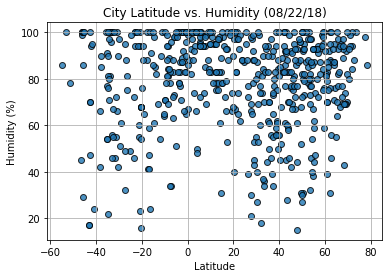

#### Latitude vs. Cloudiness Plot

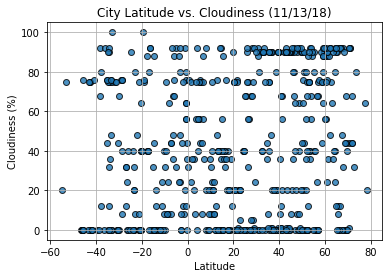

In [34]:
# Build the scatter plots for each city types
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()

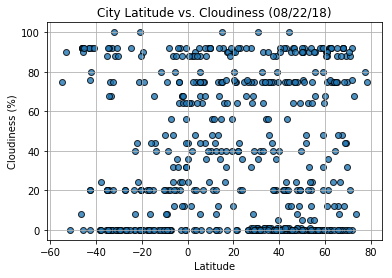

#### Latitude vs. Wind Speed Plot

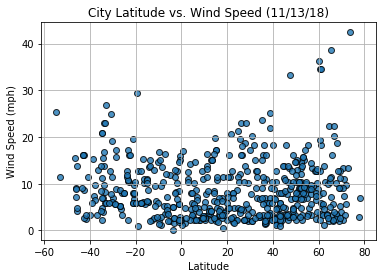

In [35]:
# Build the scatter plots for each city types
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind Speed.png")

# Show plot
plt.show()

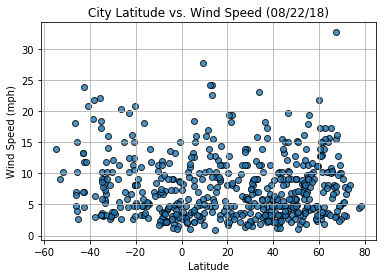